In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# load dataset
df = pd.read_csv("/kaggle/input/insurance-charges/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

In [5]:
# define a pie plot function
def pie_plot(column):
       fig , ax = plt.subplots()
       ax.pie(df[column].value_counts(),autopct="%0.2f%%",
              labels=df[column].value_counts().index)
       ax.set(title=f"Pie Chart of {column}");

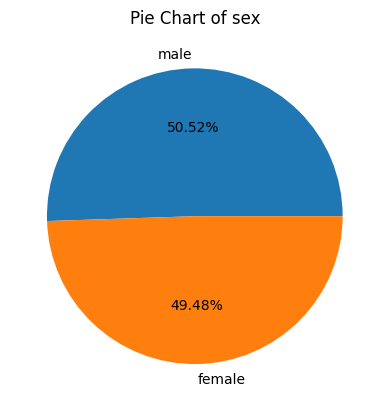

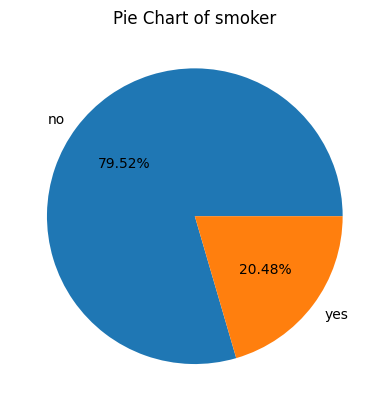

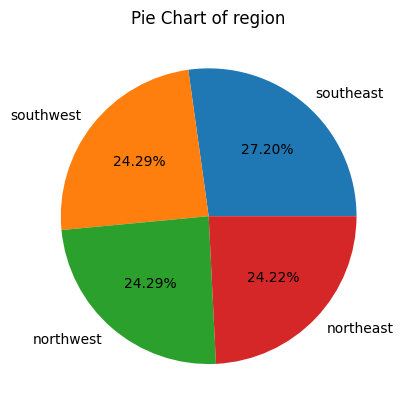

In [6]:
# take a loop on categorical columns and plot the pie chart
columns = ["sex","smoker","region"]

for i in columns:
    pie_plot(i)

Text(0.5, 1.0, 'Distribution of BMI')

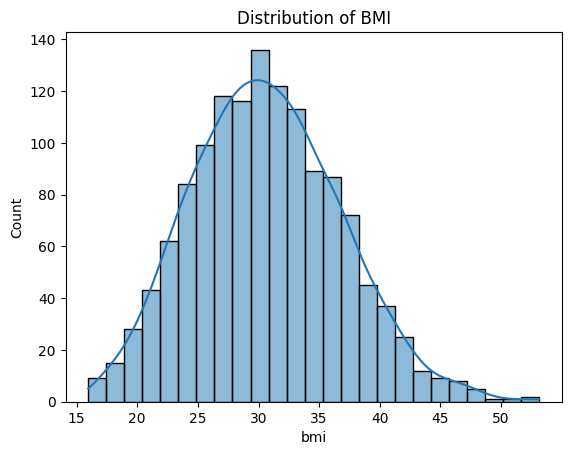

In [7]:
# plot the distribution of BMI index with histogram
sns.histplot(data=df,x="bmi",kde=True)
plt.title("Distribution of BMI")

<Axes: xlabel='sex', ylabel='bmi'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


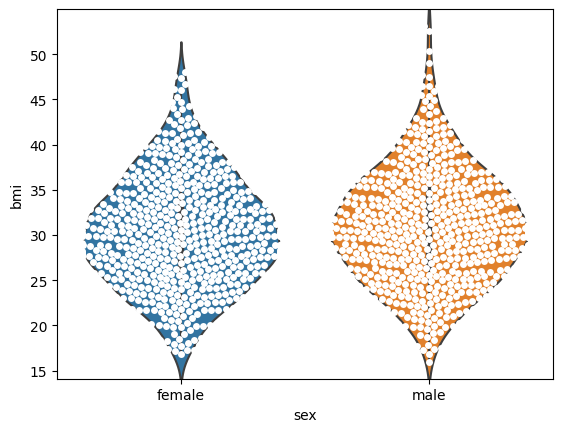

In [8]:
sns.violinplot(data=df,y="bmi",x="sex",split=True)
sns.swarmplot(data=df,y="bmi",x="sex",color="w")

<Axes: xlabel='age', ylabel='Density'>

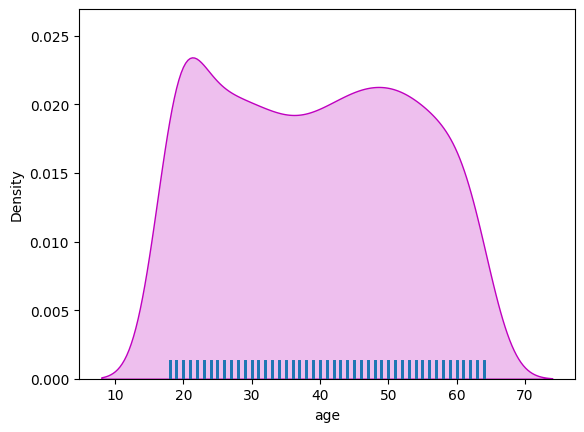

In [9]:
sns.kdeplot(df["age"],fill=True,color="m")
sns.rugplot(df["age"],height=0.05)

Text(0.5, 1.0, 'Boxplots')

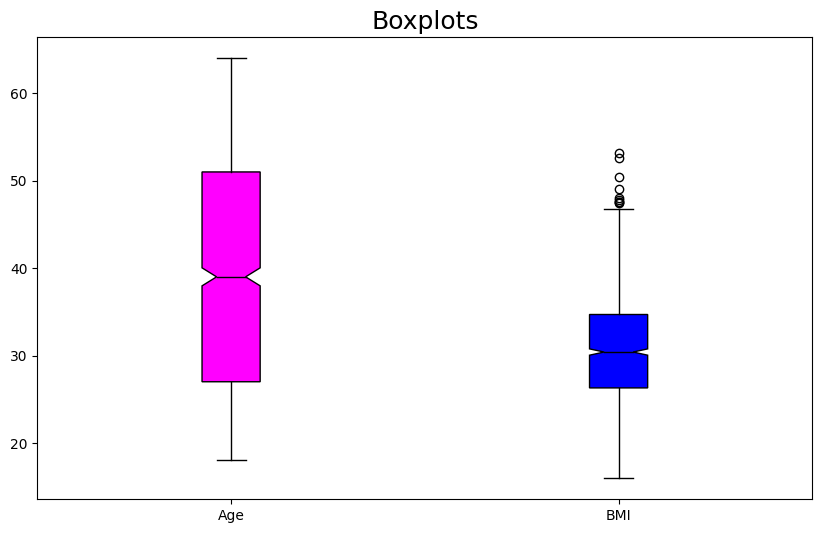

In [10]:
# plot the boxplot the 2features of the dataset(age and BMI)
fig , ax = plt.subplots(figsize=(10,6))
boxplot = ax.boxplot(df[["age", "bmi"]].values, patch_artist=True, notch=True)

colors = ["magenta", "blue"]
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

for element in ['caps', 'whiskers', 'medians']:
    plt.setp(boxplot[element], color="black")

ax.set_xticks([1, 2], ["Age", "BMI"])
ax.set_title("Boxplots",size=18)

In [11]:
# define a function to remove the outliers with IQR methods

def detect_outlier(data,treshold=1.5):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)
    iqr = q3 - q1

    lower_bound = q1 - treshold * iqr
    upper_bound = q3 + treshold * iqr

    return lower_bound,upper_bound


In [12]:
# remove the BMI outlires with IQR methods and print the outlier
low,up = detect_outlier(df["bmi"])
print(df[(df["bmi"] < low) | (df["bmi"] > up)])
index = df[(df["bmi"] < low) | (df["bmi"] > up)].index
df.drop(index=index,inplace=True)
df.reset_index(drop=True,inplace=True)

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [13]:
# check the NAN values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
# check the duplicated
df.duplicated().sum()

1

In [15]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
577,19,male,30.59,0,no,northwest,1639.5631


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
# map the specific values to each categorical
mapper_sex = {
    "male" : 1,
    "female" : 0
}

df["sex"] = df["sex"].map(mapper_sex)

In [19]:
mapper_smoker = {
    "yes":1,
    "no":0
}
df["smoker"] = df["smoker"].map(mapper_smoker)

In [20]:
mapper_region = {
    "southeast":0,
    "southwest":1,
    "northwest":2,
    "northeast":3
}
df["region"] = df["region"].map(mapper_region)

In [21]:
# check the dtypes and ensure to every features are numeric values
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

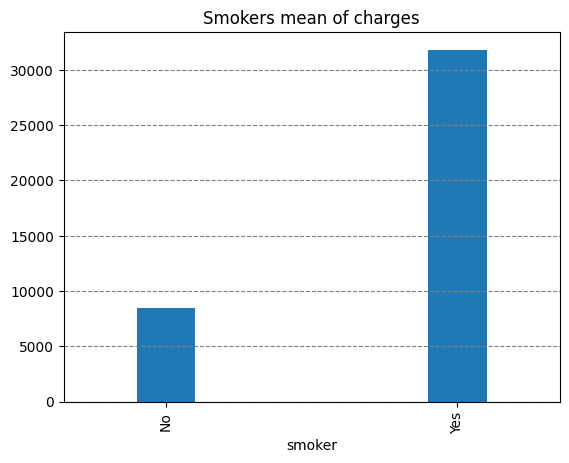

In [22]:
# grouped data into smokers and get mean values on charges columns
fig , ax = plt.subplots()
df.groupby("smoker").mean()["charges"].plot(kind="bar",ax=ax,width=0.2)
ax.set(title="Smokers mean of charges",xticks=[0,1],
       xticklabels=["No","Yes"])
ax.grid(axis="y",ls="--",color="gray")

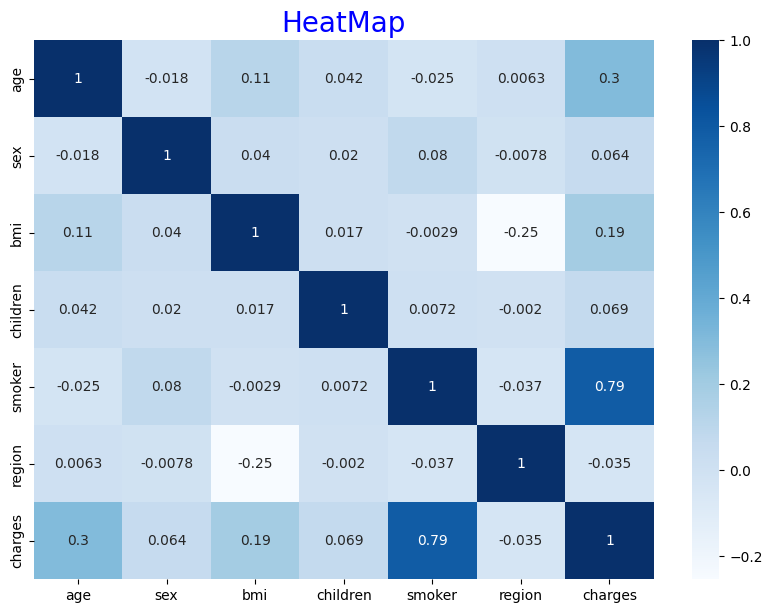

In [23]:
# plot heatmap and check the correlation between features
corr = df.corr()

fig , ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap="Blues",ax=ax)
ax.set_title("HeatMap",size=20,color="blue");

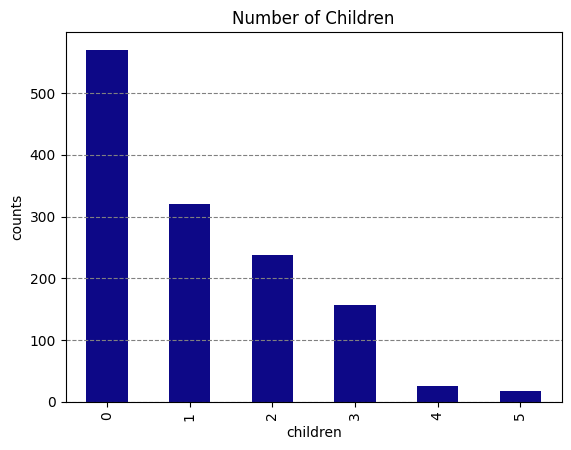

In [24]:
# plot the barplot on number of children
fig , ax = plt.subplots()
df["children"].value_counts().plot(kind="bar",ax=ax,colormap="plasma")
ax.grid(axis="y",ls="--",color="gray")
ax.set(ylabel="counts",title="Number of Children");

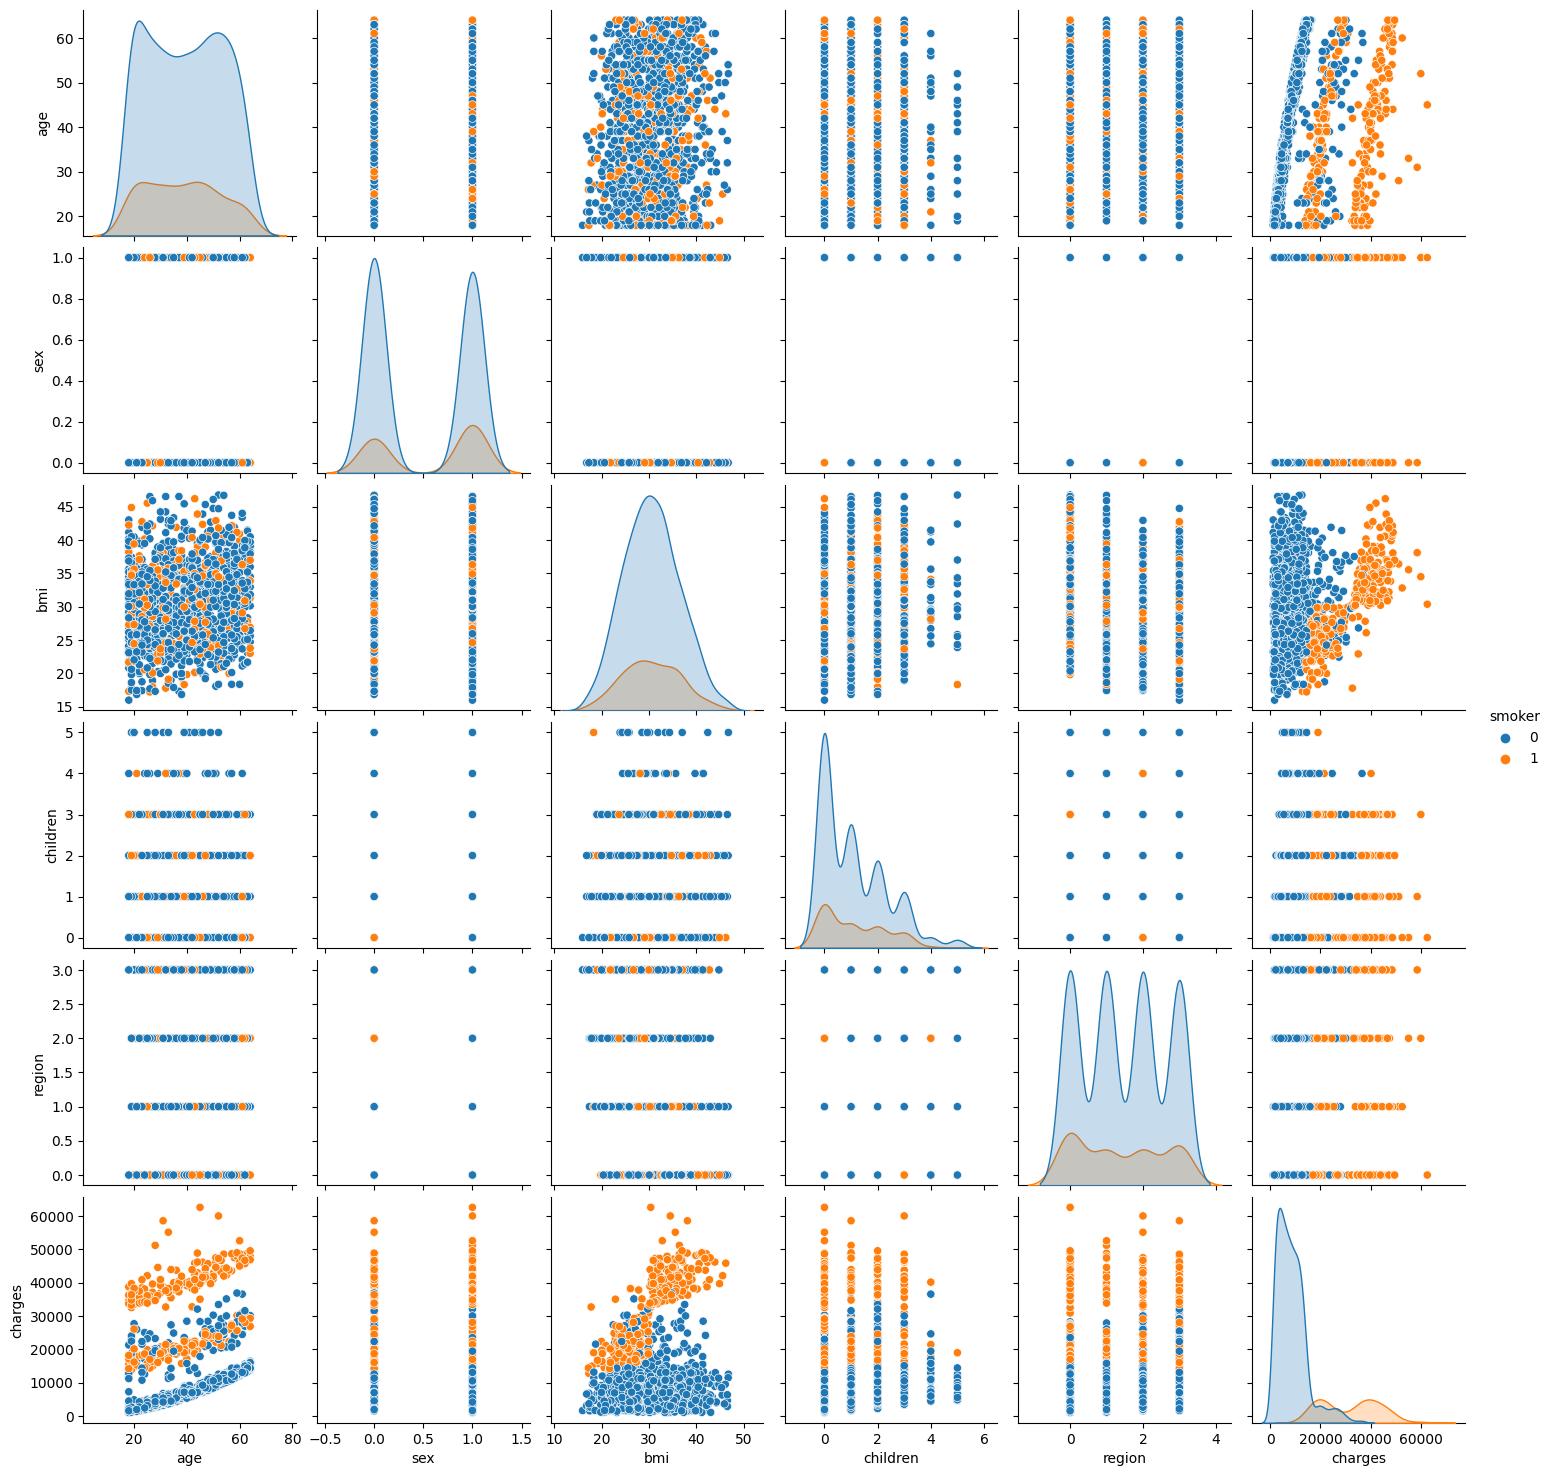

In [25]:
# plot features versus features
sns.pairplot(df,hue="smoker")

In [26]:
# determine the features(X) and target(y)
X = np.array(df.iloc[:,:-1])
y = np.array(df["charges"])

In [27]:
# split data to testset for evaluating data and train set for training the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [28]:
#scaling with method of Standard Scaling
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [29]:
# build a model of Linear Regression and evaluate the metrics
lin_reg = LinearRegression().fit(X_train_s,y_train)
pred_lin = lin_reg.predict(X_test_s)
mse_lin = mean_squared_error(y_test,pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_test,pred_lin)
r2_lin = r2_score(y_test,pred_lin)

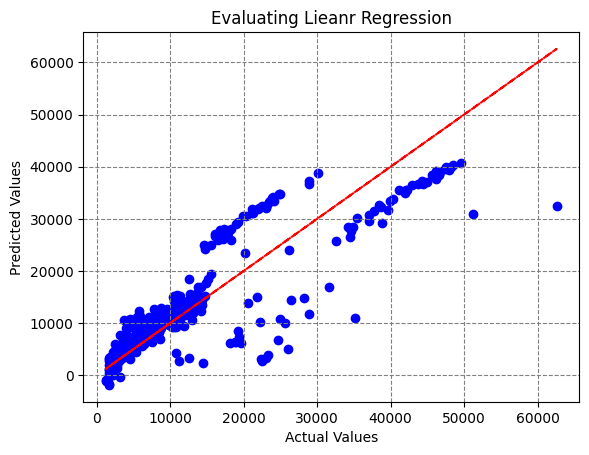

In [30]:
# plot std of true values versus predicted values 
fig , ax = plt.subplots()
ax.scatter(y_test,pred_lin,c="blue")
ax.plot(y_test,y_test,ls="--",color="red")
ax.set(xlabel="Actual Values",ylabel="Predicted Values",
       title="Evaluating Lieanr Regression")
ax.grid(axis="both",ls="--",color="gray")
#ax.set(xlim=[0,65000],ylim=[0,65000])

In [31]:
# get number of values had predicted negative
(pred_lin < 0).sum()

8

- 8 values of test set  predicted less than 0 and they are negative

In [32]:
# print metrics of Linear Regression
print("mse for linear regression:",mse_lin.round(2))
print("mae for linear regression:",mae_lin.round(2))
print("rmse for linear regression:",rmse_lin.round(2))
print("r2-score for linear regression:",r2_lin.round(3))

mse for linear regression: 40683404.41
mae for linear regression: 4417.04
rmse for linear regression: 6378.35
r2-score for linear regression: 0.735


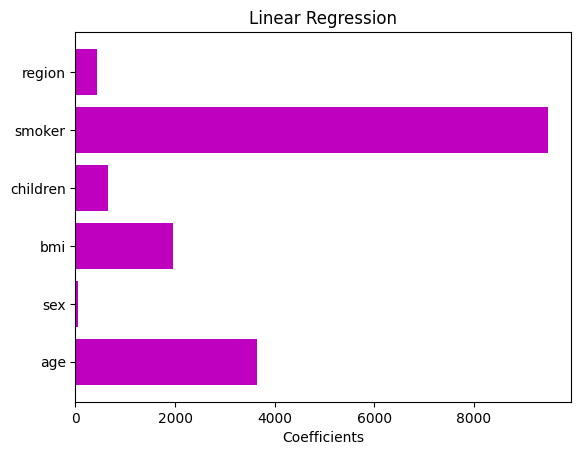

In [33]:
fig , ax = plt.subplots()
x = np.arange(6)
ax.barh(x,lin_reg.coef_,color="m")
ax.set_yticks(x,df.columns[:-1])
ax.set(xlabel="Coefficients",title="Linear Regression");

In [34]:
grb_reg = GradientBoostingRegressor(n_estimators=350,learning_rate=0.05,random_state=0,max_depth=2)
grb_reg.fit(X_train_s,y_train)
pred_grb = grb_reg.predict(X_test_s)
mse_grb = mean_squared_error(y_test,pred_grb)
rmse_grb = np.sqrt(mse_grb)
mae_grb = mean_absolute_error(y_test,pred_grb)
r2_grb = r2_score(y_test,pred_grb)

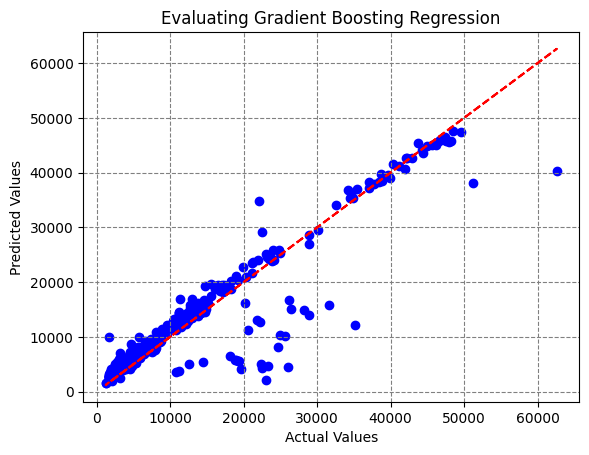

In [35]:
fig , ax = plt.subplots()
ax.scatter(y_test,pred_grb,c="blue")
ax.plot(y_test,y_test,ls="--",color="red")
ax.set(xlabel="Actual Values",ylabel="Predicted Values",
       title="Evaluating Gradient Boosting Regression")
ax.grid(axis="both",ls="--",color="gray")
#ax.set(xlim=[0,65000],ylim=[0,65000])

In [36]:
(pred_grb < 0).sum()

0

- None of them were predicted negative

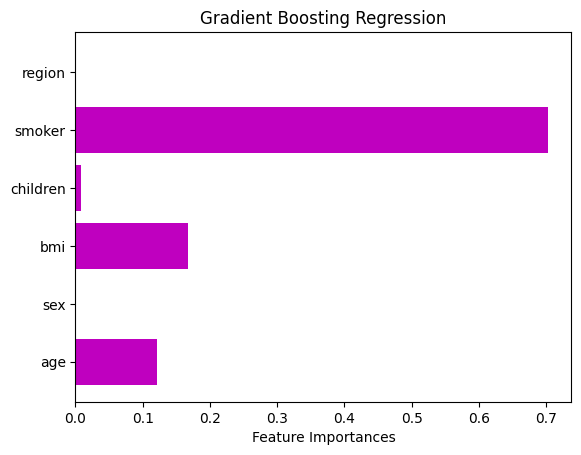

In [37]:
fig , ax = plt.subplots()
x = np.arange(6)
ax.barh(x,grb_reg.feature_importances_,color="m")
ax.set_yticks(x,df.columns[:-1])
ax.set(xlabel="Feature Importances",title="Gradient Boosting Regression");

In [38]:
print("mse for linear regression:",mse_grb.round(2))
print("mae for linear regression:",mae_grb.round(2))
print("rmse for linear regression:",rmse_grb.round(2))
print("r2-score for linear regression:",r2_grb.round(3))

mse for linear regression: 22020577.42
mae for linear regression: 2534.96
rmse for linear regression: 4692.61
r2-score for linear regression: 0.856


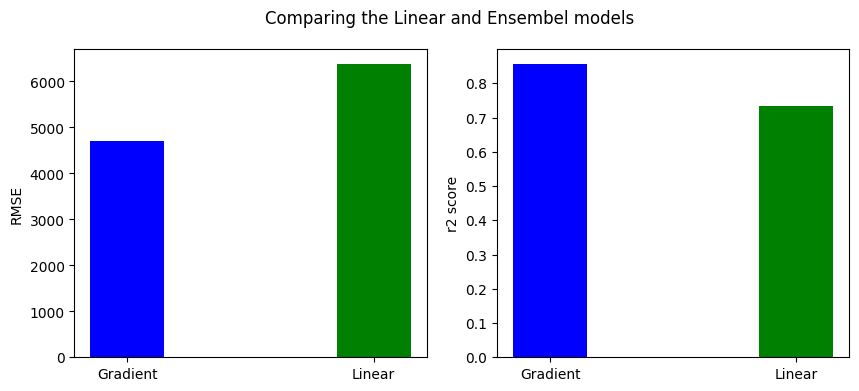

In [39]:
rmse = [rmse_grb,rmse_lin]
r2 = [r2_grb,r2_lin]

x = [0,0.5]

fig , ax = plt.subplots(1,2,figsize=(10,4))
ax[0].bar(x,rmse,width=0.15,color=["blue","green"])
ax[0].set(xticks=[0,0.5],xticklabels=["Gradient","Linear"],
          ylabel="RMSE")
ax[1].bar(x,r2,width=0.15,color=["blue","green"])
ax[1].set(xticks=[0,0.5],xticklabels=["Gradient","Linear"],
          ylabel="r2 score")
fig.suptitle("Comparing the Linear and Ensembel models");